
**###Profit prediction**

In [4]:
import numpy as np # for performing mathematical calculations behind ML algorithms
import matplotlib.pyplot as plt # for visualization
import pandas as pd # for handling and cleaning the dataset
import seaborn as sns # for visualization
import sklearn # for model evaluation and development

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# loading dataset
dataset = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/50_Startups.csv')
print(dataset, "\n")

    R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       

In [7]:
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
dataset.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [9]:
dataset.shape

(50, 5)

In [10]:
print('There are',dataset.duplicated().sum(),'duplicate values in the dateset.') #using duplicated() pre-defined function

There are 0 duplicate values in the dateset.


In [11]:
dataset.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


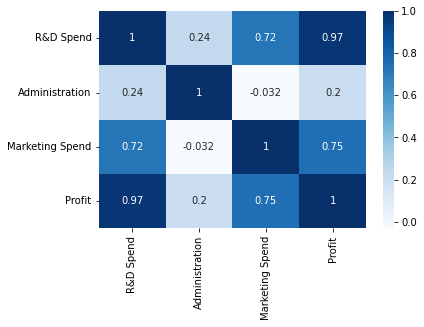

In [14]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

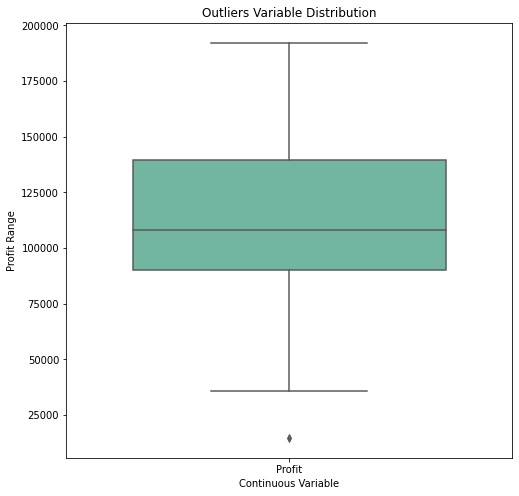

In [15]:
outliers = ['Profit']
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=dataset[outliers], orient="v", palette="Set2" , width=0.7) # orient = "v" : vertical boxplot , 
                                                                            # orient = "h" : hotrizontal boxplot
plt.title("Outliers Variable Distribution")
plt.ylabel("Profit Range")
plt.xlabel("Continuous Variable")

plt.show()

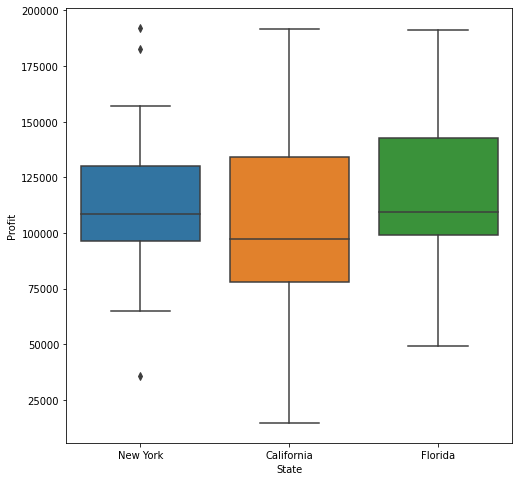

In [16]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

<ipython-input-17-1cf9bcdcae82>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['Profit'],bins=5,kde=True)


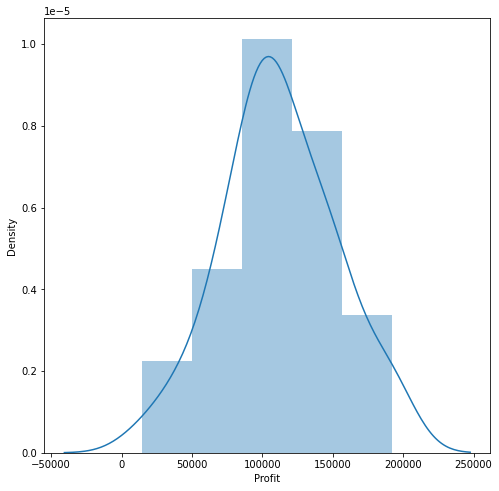

In [17]:
sns.distplot(dataset['Profit'],bins=5,kde=True)
plt.show()

In [18]:
# spliting Dataset in Dependent & Independent Variables
X = dataset.iloc[:, :-2].values
y = dataset.iloc[:, 4].values

In [19]:
X

array([[165349.2 , 136897.8 , 471784.1 ],
       [162597.7 , 151377.59, 443898.53],
       [153441.51, 101145.55, 407934.54],
       [144372.41, 118671.85, 383199.62],
       [142107.34,  91391.77, 366168.42],
       [131876.9 ,  99814.71, 362861.36],
       [134615.46, 147198.87, 127716.82],
       [130298.13, 145530.06, 323876.68],
       [120542.52, 148718.95, 311613.29],
       [123334.88, 108679.17, 304981.62],
       [101913.08, 110594.11, 229160.95],
       [100671.96,  91790.61, 249744.55],
       [ 93863.75, 127320.38, 249839.44],
       [ 91992.39, 135495.07, 252664.93],
       [119943.24, 156547.42, 256512.92],
       [114523.61, 122616.84, 261776.23],
       [ 78013.11, 121597.55, 264346.06],
       [ 94657.16, 145077.58, 282574.31],
       [ 91749.16, 114175.79, 294919.57],
       [ 86419.7 , 153514.11,      0.  ],
       [ 76253.86, 113867.3 , 298664.47],
       [ 78389.47, 153773.43, 299737.29],
       [ 73994.56, 122782.75, 303319.26],
       [ 67532.53, 105751.03, 3047

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])
X1 = pd.DataFrame(X)
X1.head()

,0,1,2
0,165349.20,136897.80,47.0
1,162597.70,151377.59,46.0
2,153441.51,101145.55,45.0
3,144372.41,118671.85,44.0
4,142107.34,91391.77,43.0


In [22]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=0)
x_train

array([[1.3029813e+05, 1.4553006e+05, 4.0000000e+01],
       [1.1994324e+05, 1.5654742e+05, 2.8000000e+01],
       [1.0002300e+03, 1.2415304e+05, 1.0000000e+00],
       [5.4205000e+02, 5.1743150e+04, 0.0000000e+00],
       [6.5605480e+04, 1.5303206e+05, 8.0000000e+00],
       [1.1452361e+05, 1.2261684e+05, 2.9000000e+01],
       [6.1994480e+04, 1.1564128e+05, 7.0000000e+00],
       [6.3408860e+04, 1.2921961e+05, 5.0000000e+00],
       [7.8013110e+04, 1.2159755e+05, 3.0000000e+01],
       [2.3640930e+04, 9.6189630e+04, 1.4000000e+01],
       [7.6253860e+04, 1.1386730e+05, 3.4000000e+01],
       [1.5505730e+04, 1.2738230e+05, 3.0000000e+00],
       [1.2054252e+05, 1.4871895e+05, 3.9000000e+01],
       [9.1992390e+04, 1.3549507e+05, 2.7000000e+01],
       [6.4664710e+04, 1.3955316e+05, 1.2000000e+01],
       [1.3187690e+05, 9.9814710e+04, 4.2000000e+01],
       [9.4657160e+04, 1.4507758e+05, 3.1000000e+01],
       [2.8754330e+04, 1.1854605e+05, 1.6000000e+01],
       [0.0000000e+00, 1.169

In [23]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(x_train,y_train)
print('Model has been trained successfully')

Model has been trained successfully


In [24]:
y_pred = model.predict(x_test)
y_pred

array([101004.64, 141585.52, 141585.52,  78239.91, 182901.99, 118474.03,
        71498.49,  97427.84, 118474.03, 156991.12,  89949.14,  89949.14,
       126992.93,  89949.14, 125370.37])

In [25]:
testing_data_model_score = model.score(x_test, y_test)
print("Model Score/Performance on Testing data",testing_data_model_score)

training_data_model_score = model.score(x_train, y_train)
print("Model Score/Performance on Training data",training_data_model_score)

Model Score/Performance on Testing data 0.9230398612935724
Model Score/Performance on Training data 1.0


In [26]:
df = pd.DataFrame(data={'Predicted value':y_pred.flatten(),'Actual Value':y_test.flatten()})
df

,Predicted value,Actual Value
0,101004.64,103282.38
1,141585.52,144259.40
2,141585.52,146121.95
3,78239.91,77798.83
4,182901.99,191050.39
5,118474.03,105008.31
6,71498.49,81229.06
7,97427.84,97483.56
8,118474.03,110352.25
9,156991.12,166187.94


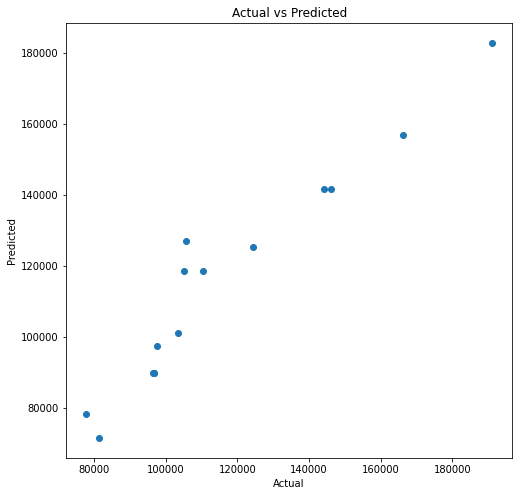

In [27]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [28]:
from sklearn.metrics import r2_score

r2Score = r2_score(y_pred, y_test)
print("R2 score of model is :" ,r2Score*100)

R2 score of model is : 91.86182786298215


In [29]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_pred, y_test)
print("Mean Squarred Error is :" ,mse*100)

Mean Squarred Error is : 7428556392.464669


In [30]:
rmse = np.sqrt(mean_squared_error(y_pred, y_test))
print("Root Mean Squarred Error is : ",rmse*100)

Root Mean Squarred Error is :  861890.7350972437


In [31]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error is :" ,mae)

Mean Absolute Error is : 6742.32066666667
